In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

In [13]:
col=[var for var in df.columns 
    if df[var].isnull().mean()< 0.05 and df[var].isnull().mean() > 0]
col


['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [14]:
df[col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
19027,0.878,no_enrollment,Primary School,6.0,NaN
3397,0.920,no_enrollment,Graduate,9.0,43.0
9331,0.920,no_enrollment,Graduate,20.0,104.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
9061,0.910,no_enrollment,Graduate,10.0,29.0


In [15]:
df[col].shape

(19158, 5)

In [16]:
len(df[col].dropna())/len(df)

0.8968577095730244

In [21]:
a=df[col].dropna()
a.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
27,0.920,no_enrollment,Graduate,5.0,72.0
2048,0.855,Part time course,Graduate,7.0,63.0
8458,0.920,no_enrollment,Graduate,20.0,78.0
8321,0.913,Full time course,Graduate,2.0,84.0
4034,0.848,Full time course,Graduate,6.0,11.0


In [19]:
a.shape

(17182, 5)

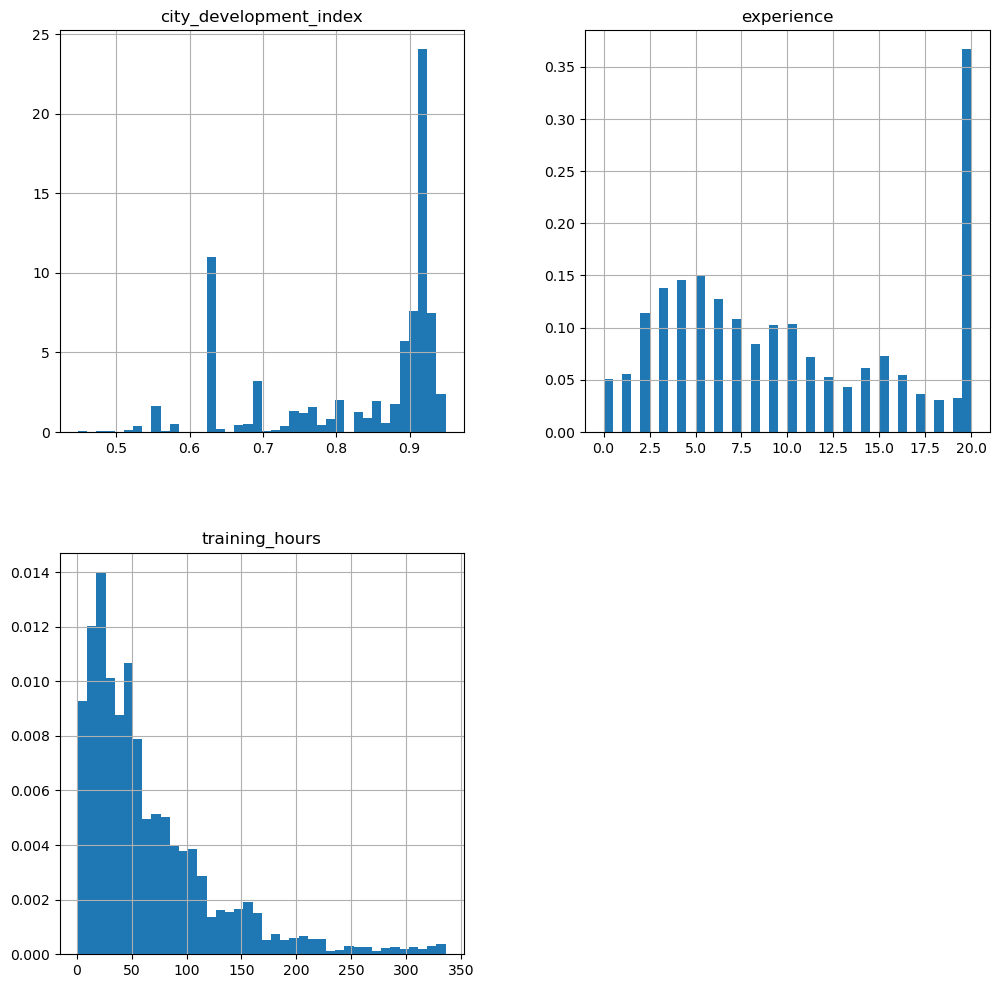

In [20]:
a.hist(bins=40,density=True,figsize=(12,12))
plt.show()

<Axes: >

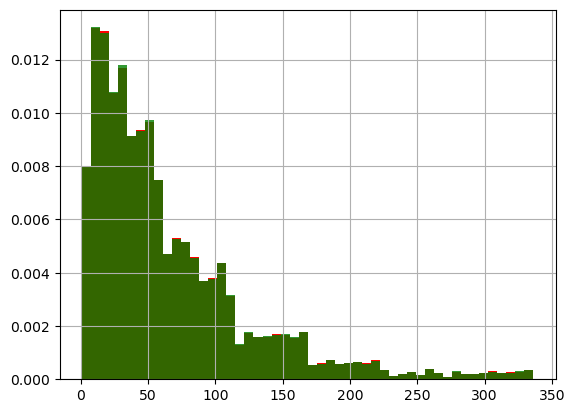

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
a['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

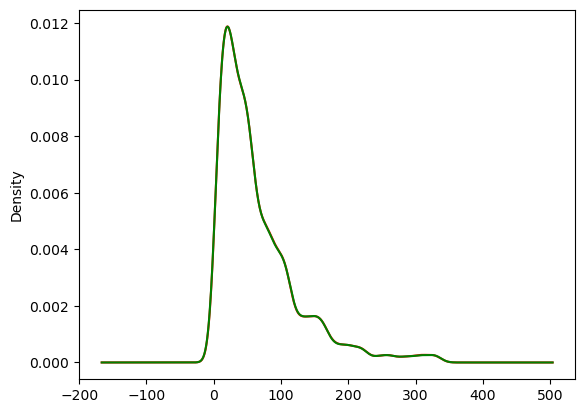

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
a['training_hours'].plot.density(color='green')

In [32]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            a['enrolled_university'].value_counts() / len(a)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
